<a href="https://colab.research.google.com/github/kolallen/OASIS_Data_Analytics_Internship_Task-2/blob/main/OASIS_INFOBYTE_Internship_Data_Analytics_Project_2_Level_2_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xg

In [ ]:
dataset= pd.read_csv('WineQT.csv')
dataset=dataset.drop(columns=["Id"])

dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


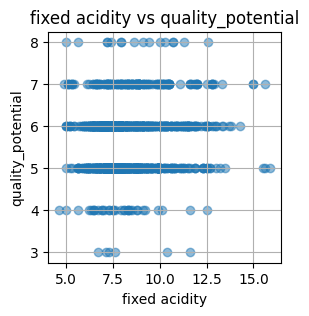

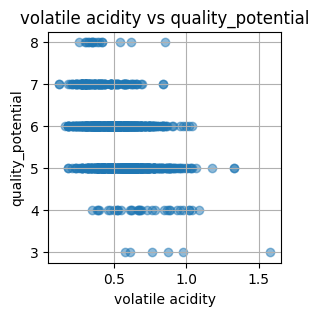

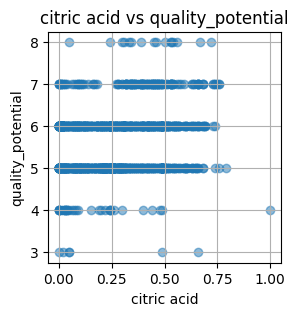

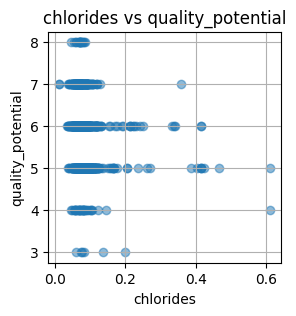

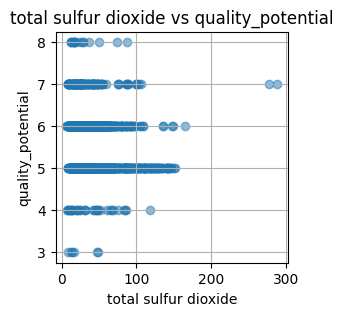

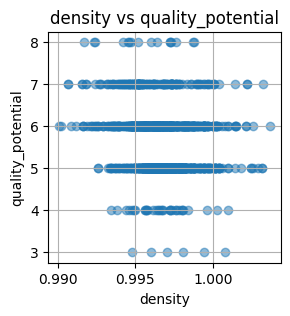

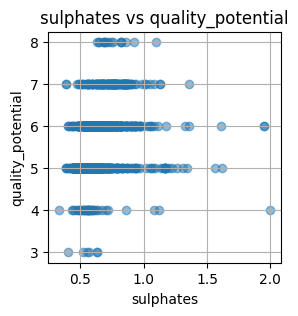

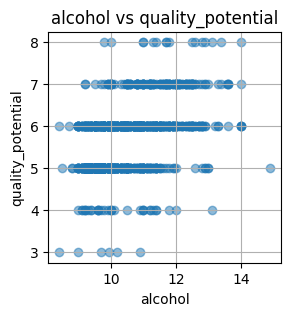

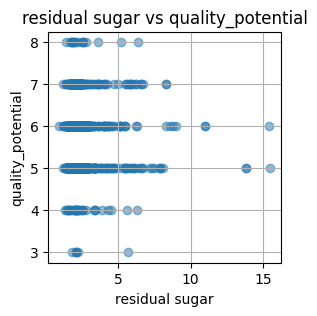

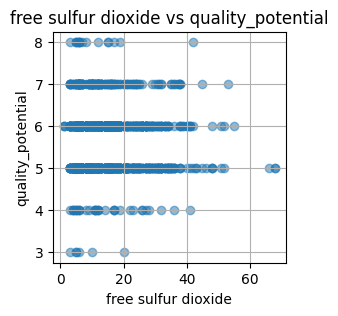

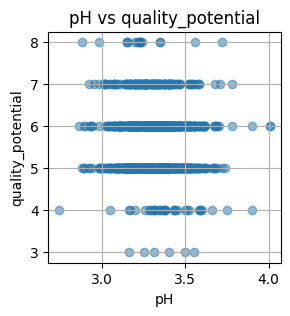

In [ ]:
features = ["fixed acidity","volatile acidity","citric acid","chlorides","total sulfur dioxide","density","sulphates","alcohol","residual sugar","free sulfur dioxide","pH"]
quality_potential = 'quality'


for feature in features:
    plt.figure(figsize=(3, 3))
    plt.scatter(dataset[feature], dataset[quality_potential], alpha=0.5)
    plt.title(f'{feature} vs quality_potential')
    plt.xlabel(feature)
    plt.ylabel('quality_potential')
    plt.grid(True)
    plt.show()

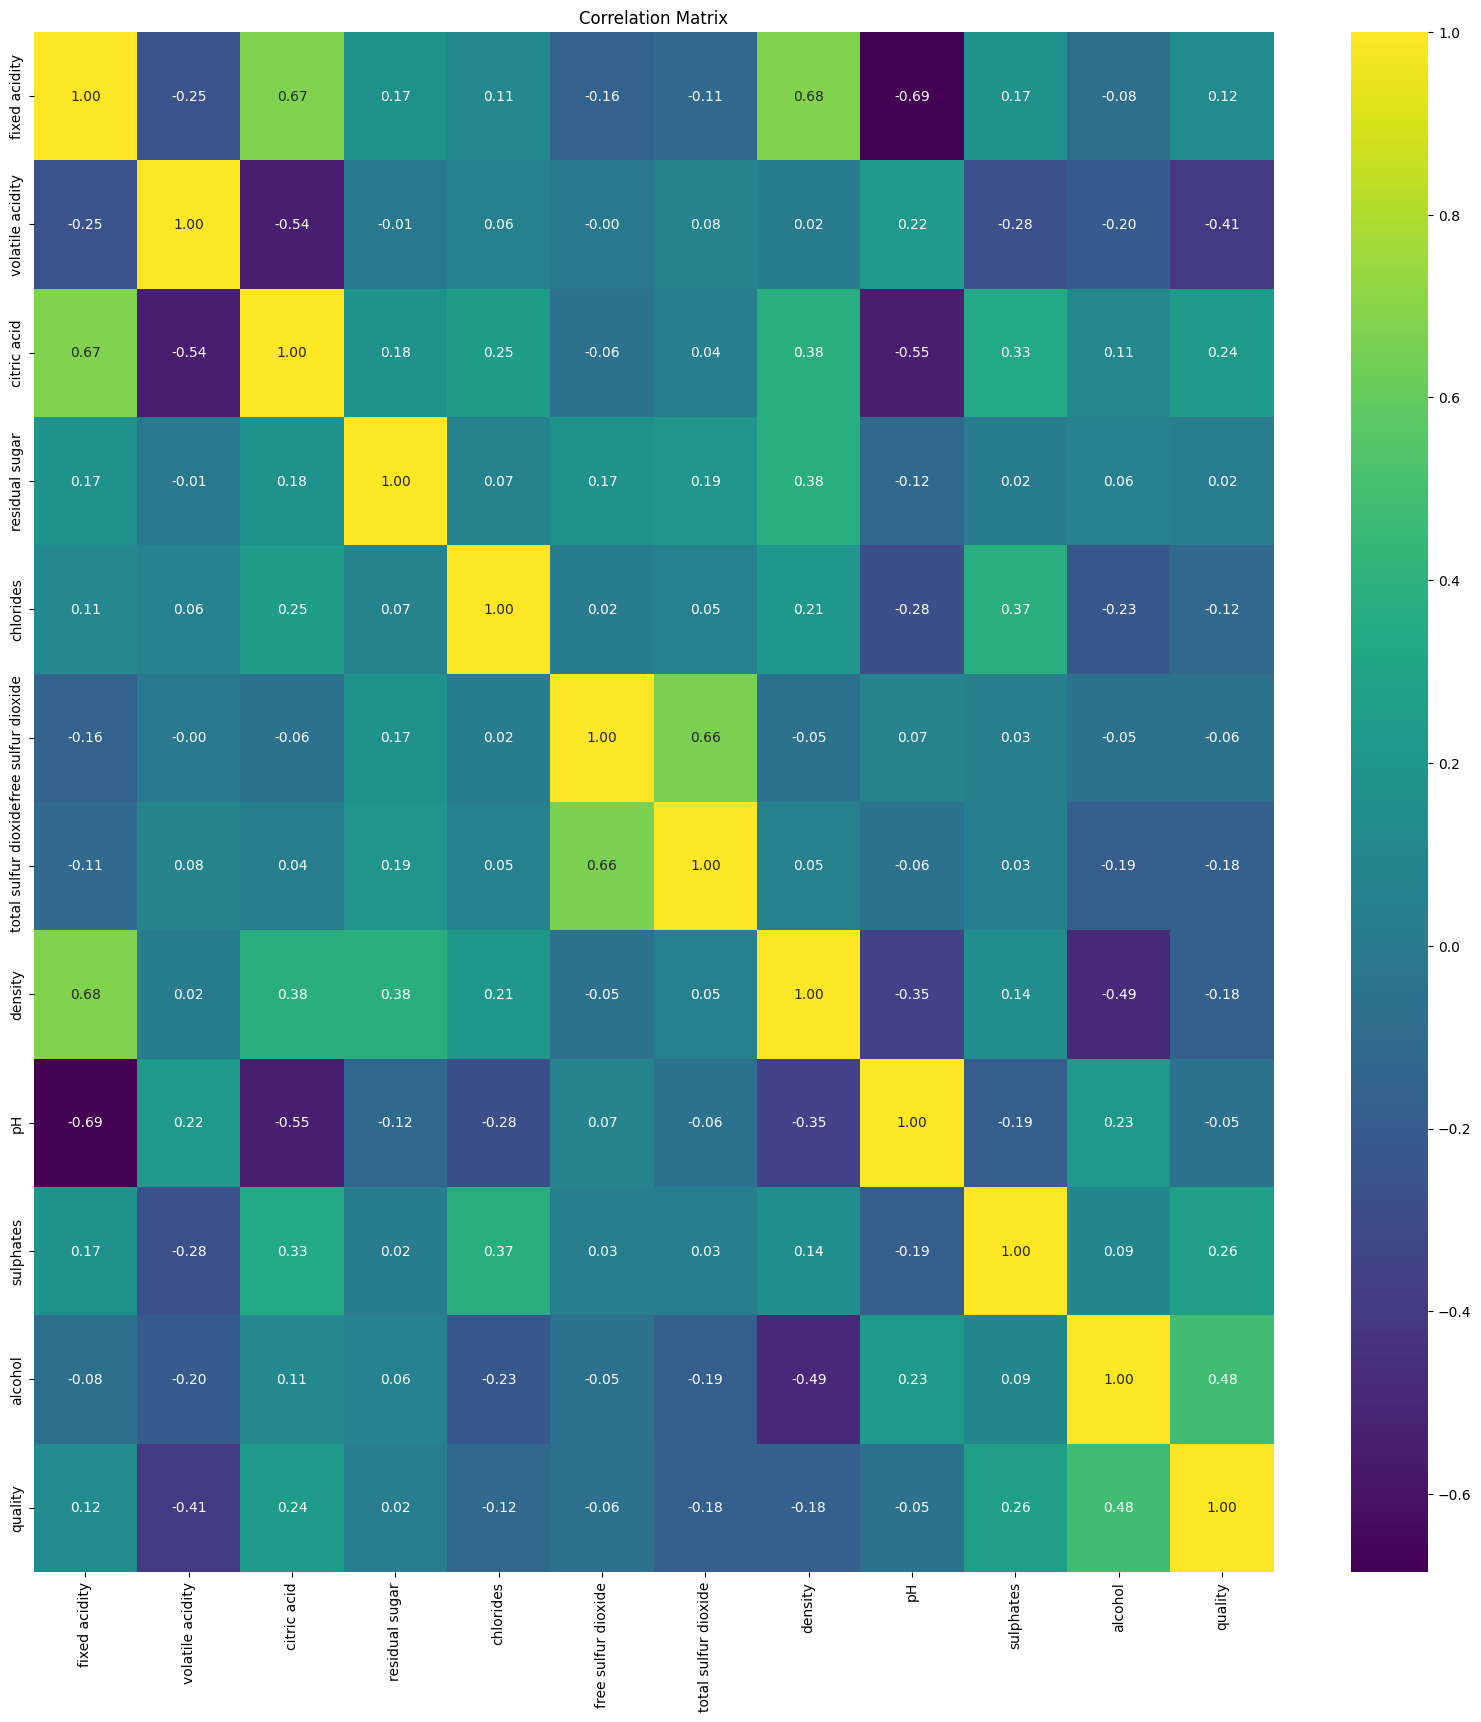

In [ ]:
import seaborn as sns
corr_mat = dataset.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

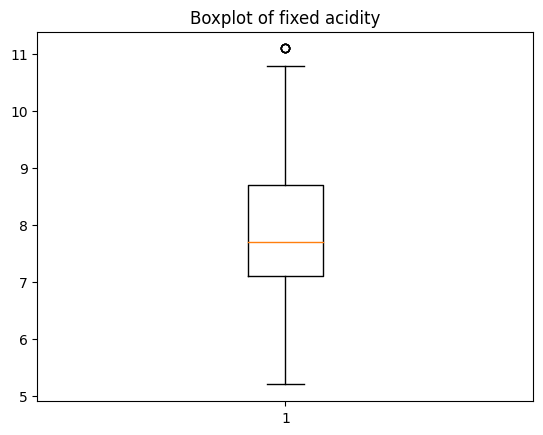

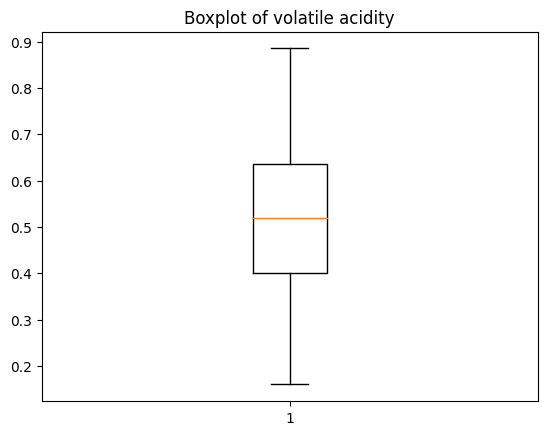

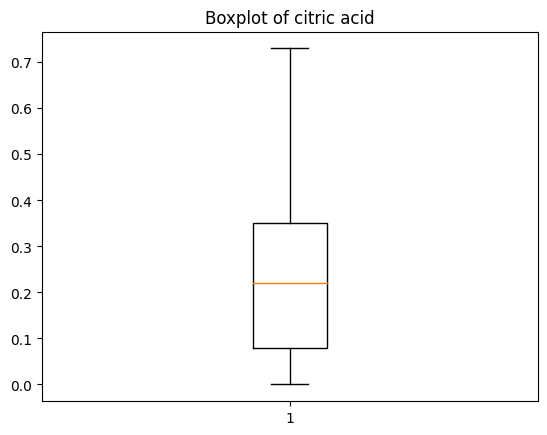

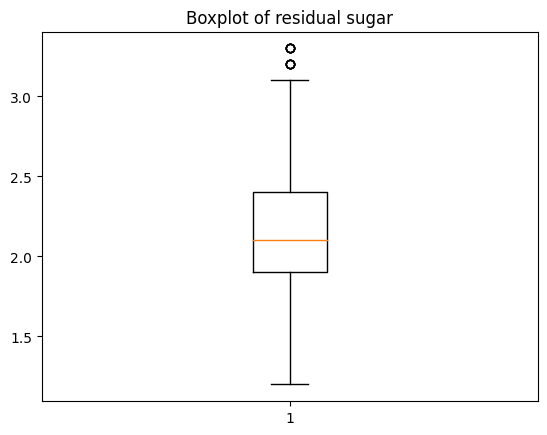

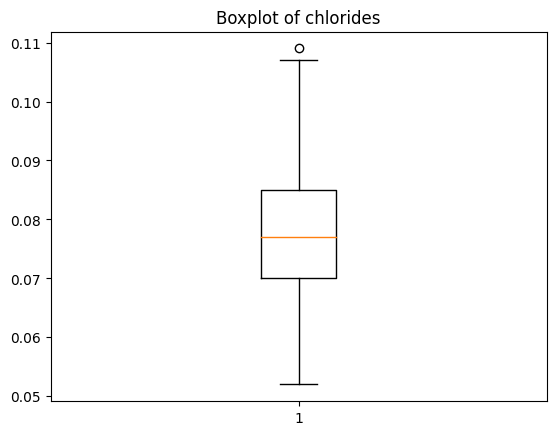

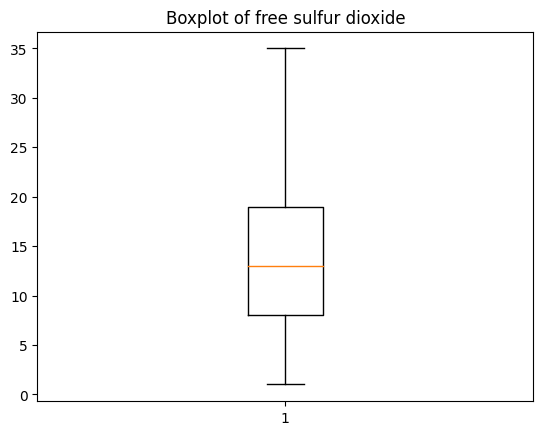

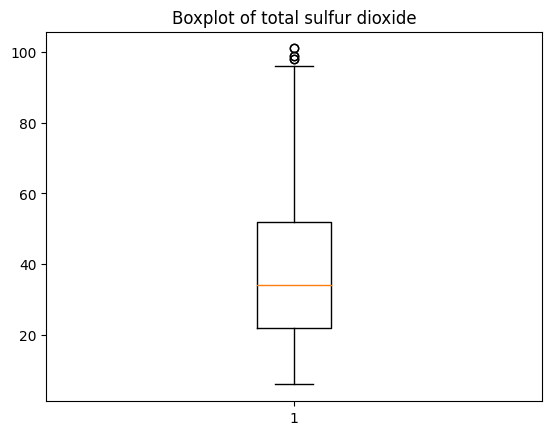

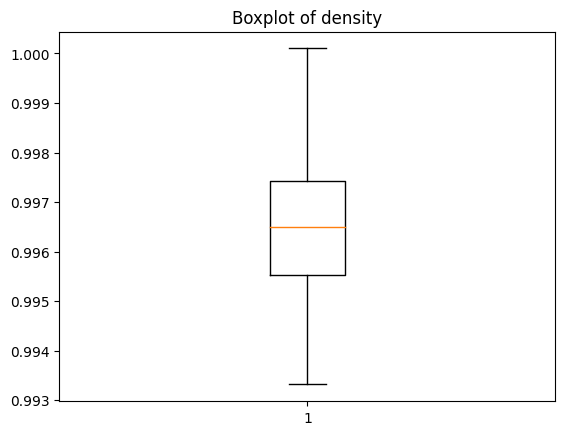

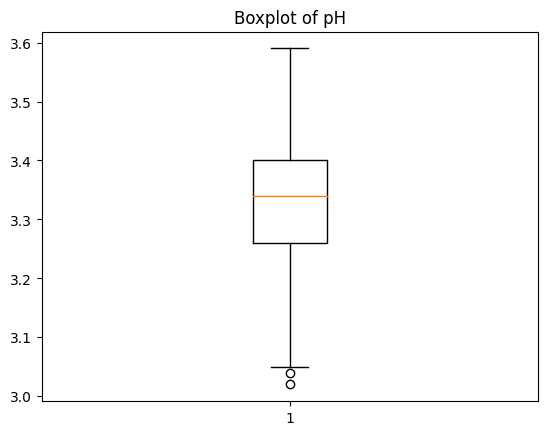

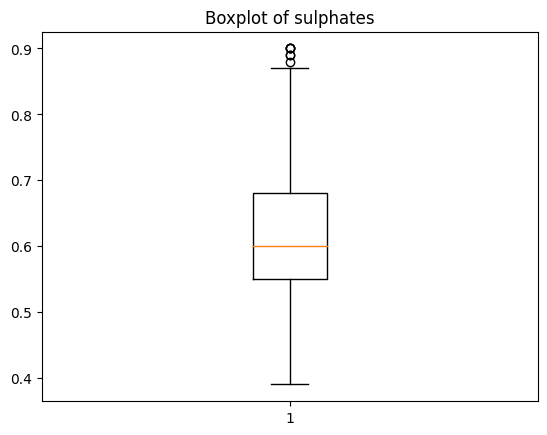

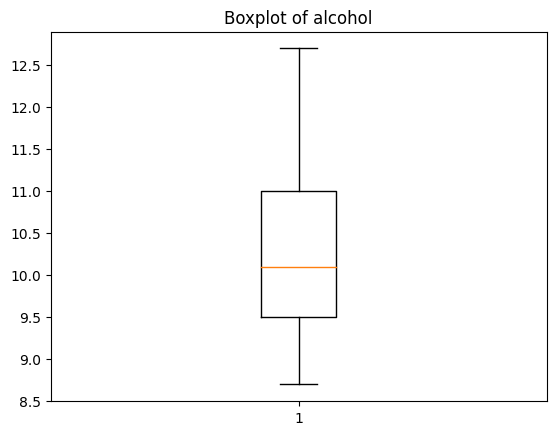

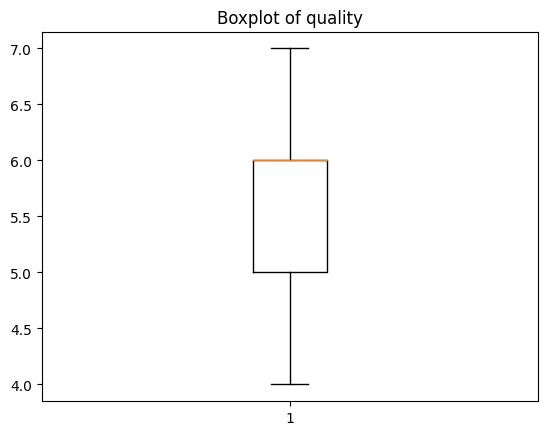

In [ ]:
def display_boxplots(dataset):
    for column in dataset.columns:
        plt.figure()
        plt.boxplot(dataset[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

def drop_outliers_iqr(dataset, threshold=1):
    filtered_df = pd.DataFrame()
    for column in dataset.columns:
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        filtered_df[column] = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)][column]
    return filtered_df

# Example usage:
# Assuming you have a dataframe called 'df'
filtered_df = drop_outliers_iqr(dataset)
filtered_df = filtered_df.dropna()
display_boxplots(filtered_df)

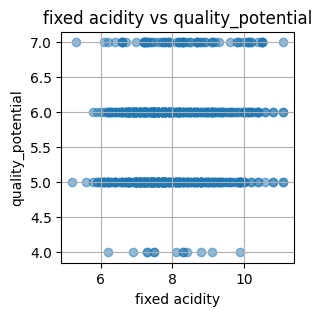

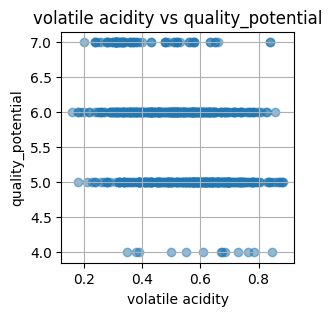

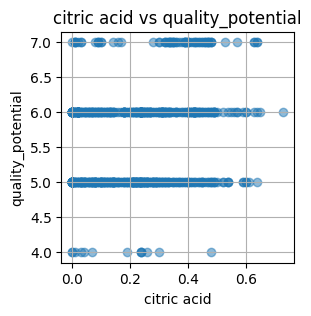

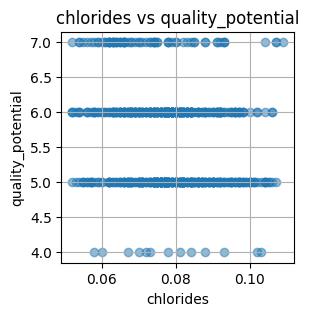

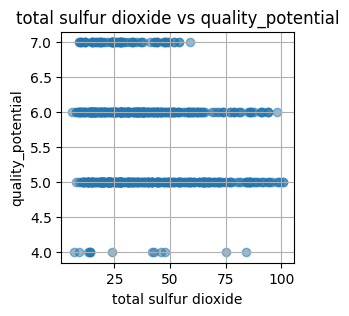

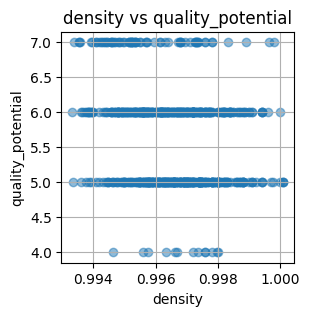

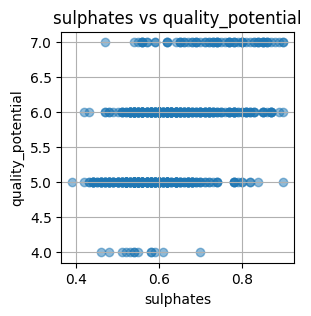

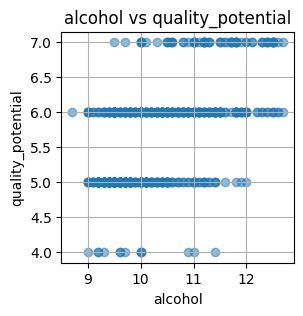

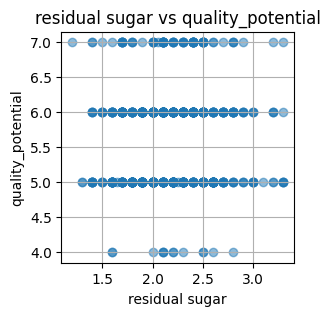

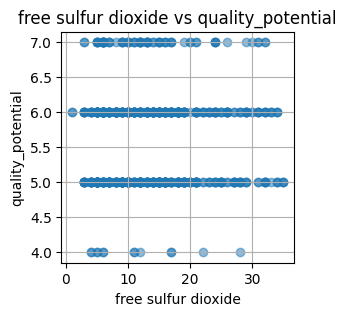

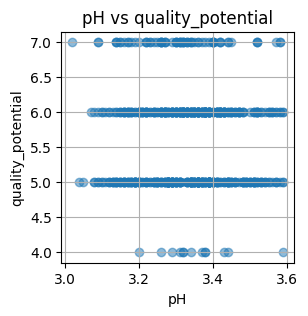

In [ ]:
features = ["fixed acidity","volatile acidity","citric acid","chlorides","total sulfur dioxide","density","sulphates","alcohol","residual sugar","free sulfur dioxide","pH"]
quality_potential = 'quality'


for feature in features:
    plt.figure(figsize=(3, 3))
    plt.scatter(filtered_df[feature], filtered_df[quality_potential], alpha=0.5)
    plt.title(f'{feature} vs quality_potential')
    plt.xlabel(feature)
    plt.ylabel('quality_potential')
    plt.grid(True)
    plt.show()

In [ ]:
X = filtered_df.iloc[:, :-1].values
y = filtered_df.iloc[:, -1].values

In [ ]:
# import numpy as np
# from scipy import stats

# z_scores = stats.zscore(X)
# threshold = 6
# outlier_indices = np.where(np.abs(z_scores) > threshold)[0]


# X = np.delete(X, outlier_indices, axis=0)
# y = np.delete(y, outlier_indices, axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score

catboost_classifier = CatBoostClassifier(verbose=False,  depth=5,       learning_rate=0.1,  iterations=1000,     l2_leaf_reg=4,      random_seed=42     )

catboost_classifier.fit(X_train, y_train)

y_catboost = catboost_classifier.predict(X_test)

accuracy_catboost = accuracy_score(y_test, y_catboost)
print("CatBoost Classifier Accuracy:", accuracy_catboost)

CatBoost Classifier Accuracy: 0.8031496062992126


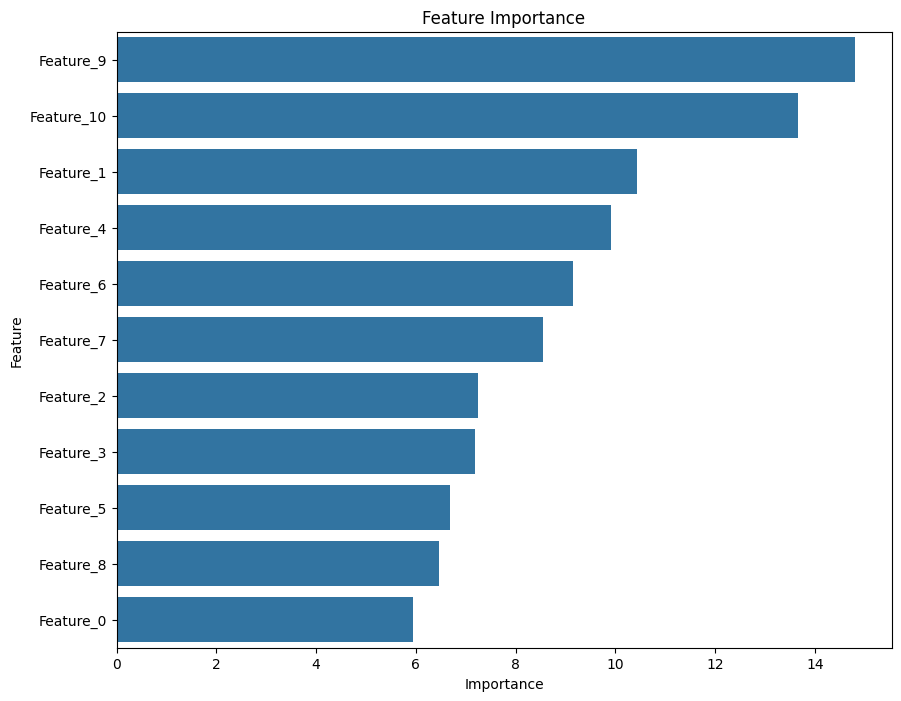

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor

catboost_model = CatBoostClassifier(verbose=False)
catboost_model.fit(X, y)

feature_importance = catboost_model.get_feature_importance()
feature_names = ["Feature_" + str(i) for i in range(len(feature_importance))]  # Example: Feature_0, Feature_1, ...
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_classifier = RandomForestClassifier(n_estimators=200,random_state=42)
rf_classifier.fit(X_train, y_train)

y_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_rf)
print("RandomForestClassifier Accuracy:", accuracy_rf)

RandomForestClassifier Accuracy: 0.8031496062992126


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score


extra_trees_classifier = ExtraTreesClassifier(n_estimators=200,random_state=42)
extra_trees_classifier.fit(X_train, y_train)

y_extra_trees = extra_trees_classifier.predict(X_test)

accuracy_extra_trees = accuracy_score(y_test, y_extra_trees)
print("ExtraTreesClassifier Accuracy:", accuracy_extra_trees)

ExtraTreesClassifier Accuracy: 0.7952755905511811


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

base_classifiers = [
    ('random_forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('catboost', CatBoostClassifier(verbose=False, depth=5, learning_rate=0.1,iterations=1000, l2_leaf_reg=4, random_seed=42))
]

meta_classifier = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=5
)

stacking_classifier.fit(X_train, y_train)

y_stacking = stacking_classifier.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_stacking)
print("Stacking Classifier Accuracy:", accuracy_stacking)

Stacking Classifier Accuracy: 0.8267716535433071
